# This is a continuation from previous part 1

## <font color='#71a1e3'> __Previous Step__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas_profiling import ProfileReport
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
from itertools import product
from termcolor import colored
import itertools
from tqdm import tqdm
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
from collections import defaultdict 
random = np.random.RandomState(42)

C:\Users\ruizh\AppData\Local\Temp\ipykernel_36896\3274972435.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error,r2_score
import pickle

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.api import VAR
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt, SimpleExpSmoothing


In [4]:
df = pd.read_csv('Energy Consumption Dataset.csv')
df

,DATE,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
0,1/1/1990,18.0,725.1,548.8
1,1/2/1990,15.8,706.7,640.7
2,1/3/1990,17.3,624.5,511.1
3,1/4/1990,18.9,574.7,515.3
4,1/5/1990,22.0,553.2,488.4
...,...,...,...,...
392,1/9/2022,27.7,986.2,513.3
393,1/10/2022,31.8,936.1,373.1
394,1/11/2022,31.0,973.4,343.9
395,1/12/2022,32.4,1147.2,348.3


In [5]:
df_set_date = df.copy()
df_set_date

,DATE,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
0,1/1/1990,18.0,725.1,548.8
1,1/2/1990,15.8,706.7,640.7
2,1/3/1990,17.3,624.5,511.1
3,1/4/1990,18.9,574.7,515.3
4,1/5/1990,22.0,553.2,488.4
...,...,...,...,...
392,1/9/2022,27.7,986.2,513.3
393,1/10/2022,31.8,936.1,373.1
394,1/11/2022,31.0,973.4,343.9
395,1/12/2022,32.4,1147.2,348.3


In [6]:
df_set_date['DATE'] = pd.to_datetime(df_set_date['DATE'],format="%d/%m/%Y")
df_set_date

,DATE,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
0,1990-01-01,18.0,725.1,548.8
1,1990-02-01,15.8,706.7,640.7
2,1990-03-01,17.3,624.5,511.1
3,1990-04-01,18.9,574.7,515.3
4,1990-05-01,22.0,553.2,488.4
...,...,...,...,...
392,2022-09-01,27.7,986.2,513.3
393,2022-10-01,31.8,936.1,373.1
394,2022-11-01,31.0,973.4,343.9
395,2022-12-01,32.4,1147.2,348.3


In [7]:
df_set_date = df_set_date.set_index('DATE')
df_set_date

,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
DATE,,,
1990-01-01,18.0,725.1,548.8
1990-02-01,15.8,706.7,640.7
1990-03-01,17.3,624.5,511.1
1990-04-01,18.9,574.7,515.3
1990-05-01,22.0,553.2,488.4
...,...,...,...
2022-09-01,27.7,986.2,513.3
2022-10-01,31.8,936.1,373.1
2022-11-01,31.0,973.4,343.9


## <font color='#71a1e3'> __Multivariate Analysis__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

From all the previous model, it is all univariate, is there a possibility that any of the variables are correlate with the other variable. Or in other words, could it have a variable that is a x variable and the other is a y variable ?

### Cointegration Test
- Determine whether two or more time series are cointegrated
- The most commonly used tests are the Engle-Granger two-step method and the Johansen test
- Here we will utilise the johansen test

In [9]:
significance_level = 0.05
output = coint_johansen(df_set_date, -1, 5)
traces = output.lr1
cvts = output.cvt[:, 1]
df_results = pd.DataFrame({ 'Name': df_set_date.columns, 'Test Statistic': traces, 'Critical Value (95%)': cvts, 'Significant?': traces > cvts})

display(df_results)

,Name,Test Statistic,Critical Value (95%),Significant?
0,Gas Consumption (tons),35.851017,24.2761,True
1,Electricity Consumption (MWh),13.782175,12.3212,True
2,Water Consumption (tons),1.645619,4.1296,False


### Granger Causality tests

Used to determine whether or not one time series is useful for forecasting another.

This test uses the following null and alternative hypotheses:

- Null Hypothesis ($H_0$): Time series x does not Granger-cause time series y

- Alternative Hypothesis ($H_1$): Time series x Granger-causes time series y

Term  of “Granger-causes” means that knowing the value of time series x at a certain lag is useful for predicting the value of time series y at a later time period.

In [9]:
maxlag=15
test = 'ssr_chi2test'

def gc_test(data, variables, test='ssr_chi2test', verbose=False):    
    ## Credits to https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in data.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

Run the results

In [10]:
gc_test(df_set_date, variables = df_set_date.columns)

,Gas Consumption (tons)_x,Electricity Consumption (MWh)_x,Water Consumption (tons)_x
Gas Consumption (tons)_y,1.0000,0.3018,0.1497
Electricity Consumption (MWh)_y,0.1018,1.0000,0.1045
Water Consumption (tons)_y,0.0335,0.0131,1.0000


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above

- Gas Consumption will cause water consumption
- ELectricity consumption will cause water consumption
- Overall, Multiverate analysis can be done here
</div>



### Seasonality Decomposition

Here, we will do the seasonality decomposition again to check on each variable

In [11]:
def seasonal_axis( ax):
    ax[0].set_ylabel('Observed')
    ax[1].set_ylabel('Trend')
    ax[2].set_ylabel('Seasonal')
    ax[3].set_ylabel('Residual')

Running the results

In [12]:
num_cols = [col for col in df.columns if str(df[col].dtype) =='float64']
print(f'The numerical features are \n {num_cols}')

The numerical features are 
 ['Gas Consumption (tons)', 'Electricity Consumption (MWh)', 'Water Consumption (tons)']


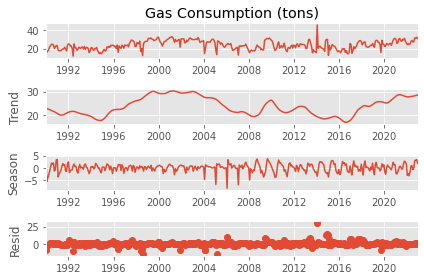

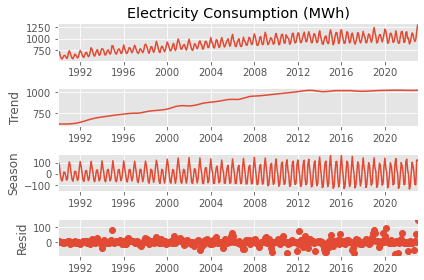

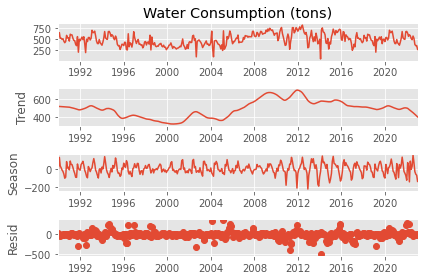

In [13]:
seasonal_hist = dict()
plt.rc("figure", figsize=(10, 10))
for index, col in enumerate(num_cols):
    if col == 'Gas Consumption (tons)':
        result = STL(df_set_date[col], period=12, robust=True).fit().plot()
    else:
        result = STL(df_set_date[col], period=12, robust=True).fit().plot()
plt.show()

### Setting the train and test split again

In [14]:
test_sizes = 80

In [15]:
train_data = df_set_date.iloc[:-test_sizes]
test_data  = df_set_date.iloc[-test_sizes:]
display(train_data) ,display(test_data) 

,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
DATE,,,
1990-01-01,18.0,725.1,548.8
1990-02-01,15.8,706.7,640.7
1990-03-01,17.3,624.5,511.1
1990-04-01,18.9,574.7,515.3
1990-05-01,22.0,553.2,488.4
...,...,...,...
2016-01-01,17.5,1194.9,477.8
2016-02-01,16.7,1073.8,469.2
2016-03-01,15.3,991.0,662.7


,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
DATE,,,
2016-06-01,19.1,1028.2,590.7
2016-07-01,19.9,1147.1,558.5
2016-08-01,15.8,1136.0,538.8
2016-09-01,17.7,994.7,478.8
2016-10-01,14.5,903.6,509.7
...,...,...,...
2022-09-01,27.7,986.2,513.3
2022-10-01,31.8,936.1,373.1
2022-11-01,31.0,973.4,343.9


(None, None)

### PACF and PCF results

Let's look at the result from above

- Non-differecned data

| Types of Consumption | q | p  | 
| ---    | ---     | :---                                   | 
| Gas Consumption     | 20,1,0     | 0,2   | (2,0,0,7) |
| Electricity Consumption   | 1     | 1,2    | 
| Water Consumption    | 1,2     | 1-2    | 

- Differenced data

| Types of Consumption | q | p  | 
| ---    | ---     | :---                                   | 
|   Electricity Consumption   | 1,2     | 1,3   | (2,0,0,7) |
| Water Consumption   | 1     | 1,2    | 

- From box cox model

| Types of Consumption | q | p  | 
| ---    | ---     | :---                                   | 
| Gas Consumption     | 20,1,0     | 0,2   | (2,0,0,7) |
| Electricity Consumption   | 1     | 1,2    | 
| Water Consumption    | 1,2     | 1,2    | 

- For box cox differenced data

 |  Types of Consumption | q | p  | 
| ---    | ---     | :---                                   | 
|   Electricity Consumption   | 1,2     | 1,3   | (2,0,0,7) |
| Water Consumption   | 1     | 1,2    | 



### Baseline Model (2)

Define the second expanding window for multivariate data

In [16]:
def expanding_window(model, column, endog, exog=None, test_size=80, n_splits=3,scores=None, **kwargs):
    tscv = TimeSeriesSplit(test_size=test_size, n_splits = n_splits)
    for idx, (train_index, test_index) in enumerate(tscv.split(endog)):
        res = model(endog.iloc[train_index], exog.iloc[train_index], **kwargs).fit()
        test_predict = res.forecast(test_size, exog = exog.iloc[test_index])
        train_predict =   res.predict( start=exog.iloc[train_index].index[0], end=exog.iloc[train_index].index[-1], exog=exog.iloc[train_index])
        test_eval = (evluation_2(column,endog.iloc[test_index],test_predict,'test',res))
        train_eval = (evluation_2(column,endog.iloc[train_index],train_predict,'train',res))
        new_row = {**train_eval, **test_eval}
        scores = scores.append(new_row,ignore_index=True)
    return scores,result


Define the evaluation again here

In [17]:
evaluation = [ "root_mean_squared_error",  "mean_absolute_percentage_error"]
scores_num_cols = ['Consumption']
count = 1
for eval in evaluation:
    scores_num_cols.append(f'train_{eval}')
    scores_num_cols.append(f'test_{eval}')
scores_num_cols

['Consumption',
 'train_root_mean_squared_error',
 'test_root_mean_squared_error',
 'train_mean_absolute_percentage_error',
 'test_mean_absolute_percentage_error']

In [18]:
def evluation_2(col, true_values, pred, types,res):
    mse = mean_squared_error(true_values, pred)
    mape = mean_absolute_percentage_error(true_values, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, pred)
    new_row = {'Consumption': col,  f'{types}_root_mean_squared_error': rmse, f'{types}_mean_absolute_percentage_error': mape, f'AIC':res.aic, f'BIC':res.bic}
    return new_row


In [19]:
scores_num_cols_new = scores_num_cols.copy() + ['AIC','BIC']

In [20]:
scores_num_cols_new

['Consumption',
 'train_root_mean_squared_error',
 'test_root_mean_squared_error',
 'train_mean_absolute_percentage_error',
 'test_mean_absolute_percentage_error',
 'AIC',
 'BIC']

In [21]:
def plot_forecast(ax, col, df,train_pred, test_pred, greyline):
    ax.plot(df[col],label='Actual', alpha=0.5)
    ax.plot(train_pred,label='Train', alpha=0.9)
    ax.plot(test_pred, label='Test', alpha=0.9, color='orange')
    ax.plot(df[col].iloc[-test_sizes:], label='Actual', alpha=0.9)
    ax.set_title(col)
    ax.legend(loc='upper left')
    ax.axvline(x = greyline, color='k', linestyle='--', alpha=0.3)

In [22]:
def style_result(df):
    return (df).style.highlight_max(subset=scores_num_cols_new[1:],
                                                    color='coral')\
    .highlight_min(subset=scores_num_cols_new[1:],color='green').highlight_null(subset=scores_num_cols_new[1:],null_color='yellow')


## <font color='#71a1e3'> __Process__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

### Gas Consumption

#### ARIMAX

Setting the order for all the possible arima orders

In [23]:
order_arima_gc = [(20,0,2),(20,0,1)]
order_ar_ma_gc = [(20,0,0),(1,0,0),(0,0,2)]
order_mv_gc = order_arima_gc + order_ar_ma_gc

In [24]:
mv_scores_arima_baseline_gc = pd.DataFrame(columns=scores_num_cols_new)
for order in tqdm(order_mv_gc):
    mv_scores_arima_baseline_gc, results = expanding_window(ARIMA, f'Gas Consumption {order}', endog=train_data['Gas Consumption (tons)'],  scores=mv_scores_arima_baseline_gc, exog=train_data[[
                                                            'Water Consumption (tons)', 'Electricity Consumption (MWh)']], order=order)


  0%|          | 0/5 [00:00<?, ?it/s]100%|██████████| 5/5 [01:19<00:00, 15.96s/it]


In [25]:
style_result(mv_scores_arima_baseline_gc.groupby('Consumption').mean())

,train_root_mean_squared_error,test_root_mean_squared_error,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,AIC,BIC
Consumption,,,,,,
"Gas Consumption (0, 0, 2)",2.736570,5.804808,0.096412,0.208112,785.207521,802.943744
"Gas Consumption (1, 0, 0)",2.627900,5.418339,0.087373,0.195070,768.260696,783.040882
"Gas Consumption (20, 0, 0)",2.381090,5.797218,0.081825,0.209202,780.767998,851.712889
"Gas Consumption (20, 0, 1)",2.378743,5.812696,0.081304,0.210177,782.962732,856.863660
"Gas Consumption (20, 0, 2)",2.374857,5.795448,0.081380,0.209285,784.352869,861.209834


__Plot Forecast__

In [26]:
model = ARIMA(endog = train_data['Gas Consumption (tons)'] ,  exog = train_data[['Water Consumption (tons)','Electricity Consumption (MWh)']], order=(1,0,0)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data[['Water Consumption (tons)','Electricity Consumption (MWh)']])

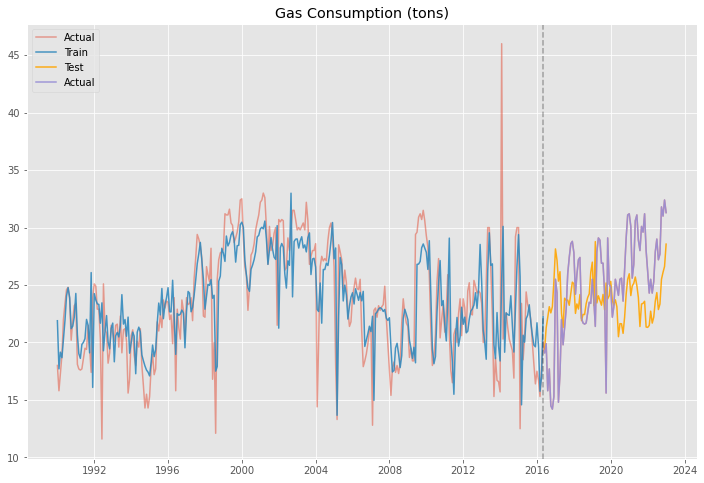

In [27]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
plot_forecast(ax,'Gas Consumption (tons)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Gas Consumption (tons)   No. Observations:                  317
Model:                     ARIMA(1, 0, 0)   Log Likelihood                -823.038
Date:                    Fri, 11 Aug 2023   AIC                           1656.076
Time:                            22:58:35   BIC                           1674.870
Sample:                        01-01-1990   HQIC                          1663.583
                             - 05-01-2016                                         
Covariance Type:                      opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            28.5605      2.592     11.017      0.000      23.480      33.641
Water Consumption (tons)         -0.0165      0.001    -16.989      0.000      -0.018      -0.015
Electricity Consumption (MWh)     0.0033      0.003      1.107      0.268      -0.003       0.009
ar.L1                             0.6700      0.042     15.858      0.000       0.587       0.753
sigma2                           10.5168      0.537     19.583      0.000       9.464      11.569
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):               635.89
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

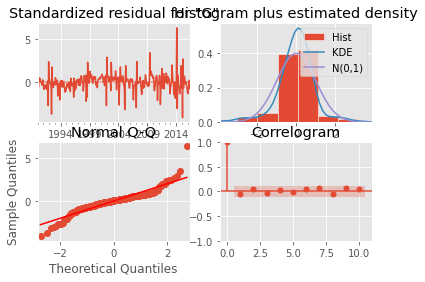

In [28]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above,
- We can see that it is indepndently distributed, hence it is a white noise time series
- Residual does not have common variance
- Data is not normal
- Forecast is nicely fit






</div>



#### SARIMAX

- Seasonal AutoRegressive Integrated Moving Average, and SARIMAX extends this model to include exogenous variables (hence the 'X')

Below, we will collate the differnt order for arima which includes ar, ma and arima model combined

In [29]:
orders_gc_seasonal = [(0,0,2,12),(0,0,1,12)]

In [30]:
mv_orders_wc = [(1,0,0),(1,1,1),(6,1,0),(6,1,1)]

In [31]:
mv_scores_sarima_baseline_gc = pd.DataFrame(columns=scores_num_cols_new)
for order in tqdm(mv_orders_wc):
    for seasonal_order in tqdm(orders_gc_seasonal):
        mv_scores_sarima_baseline_gc, results = expanding_window(SARIMAX, f'Gas Consumption {order} {seasonal_order}', endog=train_data['Gas Consumption (tons)'],  scores=mv_scores_sarima_baseline_gc, exog=train_data[[
                                                                 'Water Consumption (tons)', 'Electricity Consumption (MWh)']], order=order, seasonal_order=seasonal_order)


100%|██████████| 4/4 [01:16<00:00, 19.05s/it]


In [32]:
style_result(mv_scores_sarima_baseline_gc.groupby('Consumption').mean())

,train_root_mean_squared_error,test_root_mean_squared_error,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,AIC,BIC
Consumption,,,,,,
"Gas Consumption (1, 0, 0) (0, 0, 1, 12)",2.997825,6.781249,0.105343,0.260224,811.396762,826.176948
"Gas Consumption (1, 0, 0) (0, 0, 2, 12)",2.926762,6.838392,0.102245,0.261730,805.068696,822.804919
"Gas Consumption (1, 1, 1) (0, 0, 1, 12)",3.127224,6.245277,0.093259,0.235506,757.639348,775.328191
"Gas Consumption (1, 1, 1) (0, 0, 2, 12)",3.125347,6.302666,0.092931,0.238474,759.497196,780.134179
"Gas Consumption (6, 1, 0) (0, 0, 1, 12)",3.066139,7.387474,0.093188,0.302298,768.163412,797.644816
"Gas Consumption (6, 1, 0) (0, 0, 2, 12)",3.060830,7.512090,0.093287,0.307967,769.636799,802.066343
"Gas Consumption (6, 1, 1) (0, 0, 1, 12)",3.052884,7.154274,0.093383,0.290741,770.377284,802.806828
"Gas Consumption (6, 1, 1) (0, 0, 2, 12)",3.058201,7.429284,0.093047,0.303759,771.985705,807.363389


__Plot Forecast__

In [33]:
model = SARIMAX(endog = train_data['Gas Consumption (tons)'] ,  exog = train_data[['Water Consumption (tons)','Electricity Consumption (MWh)']], order=(1,1,1), seasonal_order=(0,0,1,12)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data[['Water Consumption (tons)','Electricity Consumption (MWh)']])

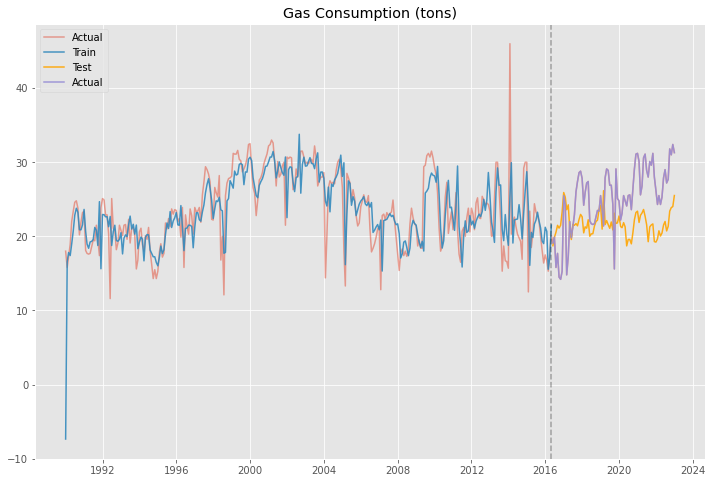

In [34]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
plot_forecast(ax,'Gas Consumption (tons)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:             Gas Consumption (tons)   No. Observations:                  317
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -817.895
Date:                            Fri, 11 Aug 2023   AIC                           1647.791
Time:                                    22:59:56   BIC                           1670.325
Sample:                                01-01-1990   HQIC                          1656.793
                                     - 05-01-2016                                         
Covariance Type:                              opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Water Consumption (tons)         -0.0150      0.001    -15.346      0.000      -0.017      -0.013
Electricity Consumption (MWh)     0.0012      0.003      0.415      0.678      -0.004       0.007
ar.L1                             0.5597      0.049     11.394      0.000       0.463       0.656
ma.L1                            -0.9360      0.028    -32.949      0.000      -0.992      -0.880
ma.S.L12                         -0.0789      0.035     -2.234      0.026      -0.148      -0.010
sigma2                           10.3306      0.507     20.358      0.000       9.336      11.325
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               691.72
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

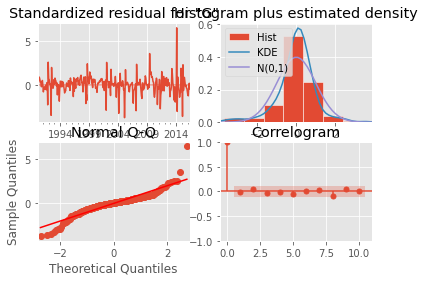

In [35]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above,
- We can see that it is indepndently distributed, hence it is a white noise time series
- Residual does not have common variance
- Data is not normal
- Forecast is nicely fit






</div>



### Electrcity Consumption

#### ARIMAX

Setting the order for all the possible arima orders

In [36]:
order_ar_ma_ec  = [(0,0,1),(0,0,2),(0,1,1),(0,1,2)]
order_arima_ec = [(1,0,2),(1,1,2),(2,0,1)]
order_mv_ec = order_arima_ec + order_ar_ma_ec

In [37]:
mv_scores_arima_baseline_ec = pd.DataFrame(columns=scores_num_cols_new)
for order in tqdm(order_mv_ec):
    mv_scores_arima_baseline_ec, results = expanding_window(ARIMA, f'Electricity Consumption {order}', endog=train_data['Electricity Consumption (MWh)'],  scores=mv_scores_arima_baseline_ec, exog=train_data[[
                                                            'Water Consumption (tons)', 'Gas Consumption (tons)']], order=order)


  0%|          | 0/7 [00:00<?, ?it/s]100%|██████████| 7/7 [00:16<00:00,  2.42s/it]


In [38]:
style_result(mv_scores_arima_baseline_ec.groupby('Consumption').mean())

,train_root_mean_squared_error,test_root_mean_squared_error,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,AIC,BIC
Consumption,,,,,,
"Electricity Consumption (0, 0, 1)",56.176518,184.357696,0.061477,0.169821,1739.561743,1754.341929
"Electricity Consumption (0, 0, 2)",46.033762,180.826842,0.051376,0.166553,1675.117949,1692.854172
"Electricity Consumption (0, 1, 1)",78.332349,107.298500,0.060624,0.090321,1672.330557,1684.123119
"Electricity Consumption (0, 1, 2)",75.255265,104.841664,0.054126,0.088517,1650.601452,1665.342154
"Electricity Consumption (1, 0, 2)",45.027881,263.799201,0.048841,0.251717,1668.717341,1689.409601
"Electricity Consumption (1, 1, 2)",74.727176,107.484981,0.052190,0.090731,1634.499803,1652.188645
"Electricity Consumption (2, 0, 1)",45.040518,249.088592,0.048716,0.234371,1669.581949,1690.274209


__Plot Forecast__

In [39]:
model = ARIMA(endog = train_data['Electricity Consumption (MWh)'] ,  exog = train_data[['Water Consumption (tons)','Gas Consumption (tons)']], order=(1,1,2)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data[['Water Consumption (tons)','Gas Consumption (tons)']])

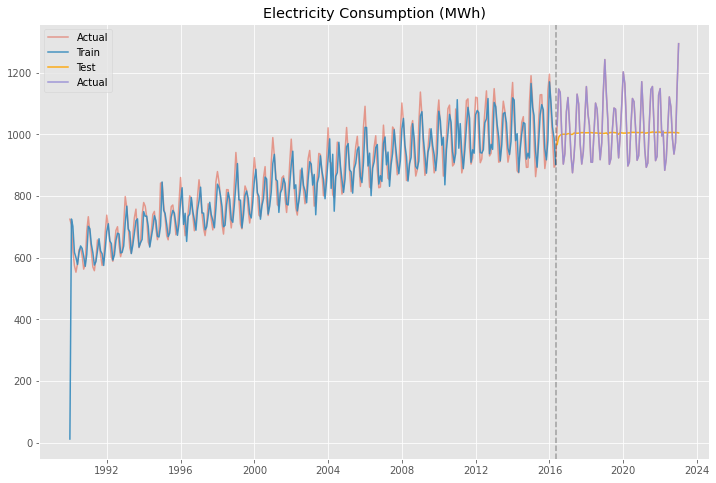

In [40]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
plot_forecast(ax,'Electricity Consumption (MWh)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Electricity Consumption (MWh)   No. Observations:                  317
Model:                            ARIMA(1, 1, 2)   Log Likelihood               -1700.938
Date:                           Fri, 11 Aug 2023   AIC                           3413.875
Time:                                   23:00:15   BIC                           3436.410
Sample:                               01-01-1990   HQIC                          3422.878
                                    - 05-01-2016                                         
Covariance Type:                             opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Water Consumption (tons)     0.0105      0.026      0.399      0.690      -0.041       0.062
Gas Consumption (tons)       0.3716      0.659      0.564      0.573      -0.920       1.663
ar.L1                        0.3468      0.089      3.899      0.000       0.172       0.521
ma.L1                       -0.2419      0.059     -4.067      0.000      -0.358      -0.125
ma.L2                       -0.6584      0.052    -12.722      0.000      -0.760      -0.557
sigma2                    2759.0637    214.225     12.879      0.000    2339.190    3178.937
===================================================================================
Ljung-Box (L1) (Q):                   3.45   Jarque-Bera (JB):                 1.45
Prob(Q):                              0.06   Prob(JB):                         0.48
Heteroskedasticity (H):               2.61   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

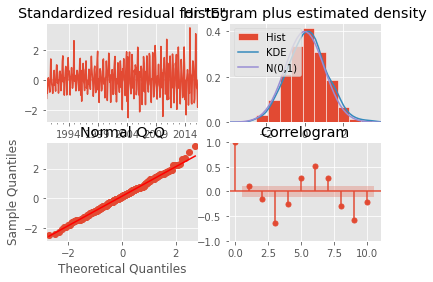

In [41]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above,
- We can see that it is indepndently distributed, hence it is a white noise time series
- Residual does not have common variance
- Data is normal
- Forecast is not nicely fit






</div>



#### SARIMAX

- Seasonal AutoRegressive Integrated Moving Average, and SARIMAX extends this model to include exogenous variables (hence the 'X')

Below, we will collate the differnt order for arima which includes ar, ma and arima model combined

In [42]:
orders_ec_seasonal = [(0,0,1,12),(0,0,2,12)]

In [43]:
mv_scores_sarima_baseline_ec = pd.DataFrame(columns=scores_num_cols_new)
for order in tqdm(order_mv_ec):
       for seasonal_order in tqdm(orders_ec_seasonal):
              mv_scores_sarima_baseline_ec,results = expanding_window(SARIMAX, f'Electricity Consumption {order} {seasonal_order}', endog = train_data['Electricity Consumption (MWh)'],  scores=mv_scores_sarima_baseline_ec, exog = train_data[['Water Consumption (tons)','Gas Consumption (tons)']], order = order,seasonal_order=seasonal_order)

100%|██████████| 7/7 [01:25<00:00, 12.16s/it]


In [44]:
style_result(mv_scores_sarima_baseline_ec.groupby('Consumption').mean())

,train_root_mean_squared_error,test_root_mean_squared_error,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,AIC,BIC
Consumption,,,,,,
"Electricity Consumption (0, 0, 1) (0, 0, 1, 12)",82.408429,182.629809,0.087309,0.156070,1848.607477,1863.387662
"Electricity Consumption (0, 0, 1) (0, 0, 2, 12)",79.321301,190.695399,0.083151,0.163944,1838.105640,1855.841863
"Electricity Consumption (0, 0, 2) (0, 0, 1, 12)",76.674152,195.743928,0.077831,0.169282,1826.697092,1844.433314
"Electricity Consumption (0, 0, 2) (0, 0, 2, 12)",73.943369,208.350067,0.074297,0.182916,1816.231453,1836.923713
"Electricity Consumption (0, 1, 1) (0, 0, 1, 12)",72.664476,88.542572,0.045620,0.078484,1582.510459,1597.251161
"Electricity Consumption (0, 1, 1) (0, 0, 2, 12)",71.064416,96.879125,0.042189,0.077024,1558.451113,1576.139955
"Electricity Consumption (0, 1, 2) (0, 0, 1, 12)",71.321883,100.314001,0.041448,0.083985,1553.558714,1571.247556
"Electricity Consumption (0, 1, 2) (0, 0, 2, 12)",69.043156,101.238781,0.037837,0.083407,1521.622797,1542.259779
"Electricity Consumption (1, 0, 2) (0, 0, 1, 12)",73.918071,145.157129,0.052785,0.125753,1655.878411,1676.570671


__Plot Forecast__

In [45]:
model = SARIMAX(endog=train_data['Electricity Consumption (MWh)'],  exog=train_data[[
                'Water Consumption (tons)', 'Gas Consumption (tons)']], order=(0, 1, 2), seasonal_order=(0, 0, 2, 12)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes, exog=test_data[[
                      'Water Consumption (tons)', 'Gas Consumption (tons)']])

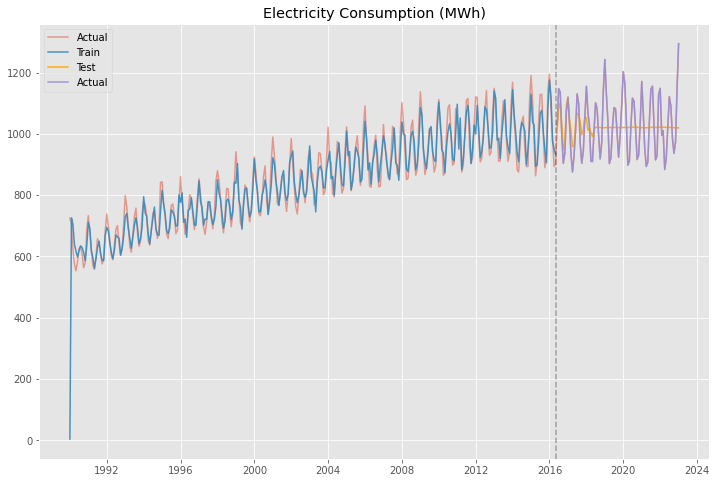

In [46]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
plot_forecast(ax,'Electricity Consumption (MWh)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:      Electricity Consumption (MWh)   No. Observations:                  317
Model:             SARIMAX(0, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -1578.048
Date:                            Fri, 11 Aug 2023   AIC                           3170.095
Time:                                    23:01:45   BIC                           3196.385
Sample:                                01-01-1990   HQIC                          3180.598
                                     - 05-01-2016                                         
Covariance Type:                              opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Water Consumption (tons)     0.0070      0.015      0.459      0.646      -0.023       0.037
Gas Consumption (tons)       0.0223      0.382      0.059      0.953      -0.725       0.770
ma.L1                       -0.2394      0.040     -5.933      0.000      -0.319      -0.160
ma.L2                       -0.6466      0.048    -13.577      0.000      -0.740      -0.553
ma.S.L12                     0.7775      0.054     14.278      0.000       0.671       0.884
ma.S.L24                     0.4514      0.050      8.952      0.000       0.353       0.550
sigma2                    1232.4612     91.893     13.412      0.000    1052.355    1412.568
===================================================================================
Ljung-Box (L1) (Q):                   2.95   Jarque-Bera (JB):                 7.80
Prob(Q):                              0.09   Prob(JB):                         0.02
Heteroskedasticity (H):               2.38   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

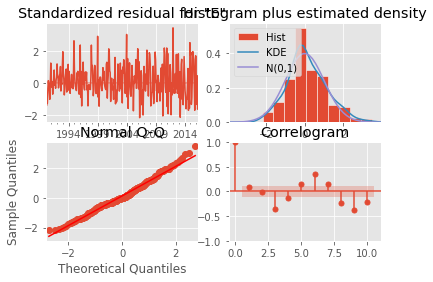

In [47]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above,
- We can see that it is indepndently distributed, hence it is a white noise time series
- Residual does not have common variance
- Data is not normal
- Forecast is not nicely fit






</div>



### Water Consumption

#### ARIMAX

Setting the order for all the possible arima orders

In [48]:
order_ar_ma_wc  = [(1,0,0),(2,0,0),(0,0,1),(0,0,2),(1,1,0),(0,1,1)]
order_arima_wc = [(1,1,1),(2,1,1)]
order_mv_wc = order_arima_wc + order_ar_ma_wc

In [49]:
mv_scores_arima_baseline_wc = pd.DataFrame(columns=scores_num_cols_new)
for order in tqdm(order_mv_wc):
    mv_scores_arima_baseline_wc, results = expanding_window(ARIMA, f'Electricity Consumption {order}', endog=train_data['Electricity Consumption (MWh)'],  scores=mv_scores_arima_baseline_wc, exog=train_data[[
                                                            'Water Consumption (tons)', 'Gas Consumption (tons)']], order=order)


100%|██████████| 8/8 [00:11<00:00,  1.38s/it]


In [50]:
style_result(mv_scores_arima_baseline_wc.groupby('Consumption').mean())

,train_root_mean_squared_error,test_root_mean_squared_error,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,AIC,BIC
Consumption,,,,,,
"Electricity Consumption (0, 0, 1)",56.176518,184.357696,0.061477,0.169821,1739.561743,1754.341929
"Electricity Consumption (0, 0, 2)",46.033762,180.826842,0.051376,0.166553,1675.117949,1692.854172
"Electricity Consumption (0, 1, 1)",78.332349,107.298500,0.060624,0.090321,1672.330557,1684.123119
"Electricity Consumption (1, 0, 0)",55.349841,174.556738,0.063150,0.159263,1728.227025,1743.007211
"Electricity Consumption (1, 1, 0)",81.789646,121.192326,0.066692,0.107057,1703.008253,1714.800815
"Electricity Consumption (1, 1, 1)",78.262314,108.615071,0.060497,0.091501,1673.711158,1688.451860
"Electricity Consumption (2, 0, 0)",48.129819,246.590216,0.052358,0.232791,1690.361089,1708.097312
"Electricity Consumption (2, 1, 1)",69.108555,100.942638,0.041835,0.081853,1548.321593,1566.010435


__Plot Forecast__

In [51]:
model = ARIMA(endog=train_data['Water Consumption (tons)'],  exog=train_data[[
              'Electricity Consumption (MWh)', 'Gas Consumption (tons)']], order=(2, 1, 1)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes, exog=test_data[[
                      'Electricity Consumption (MWh)', 'Gas Consumption (tons)']])


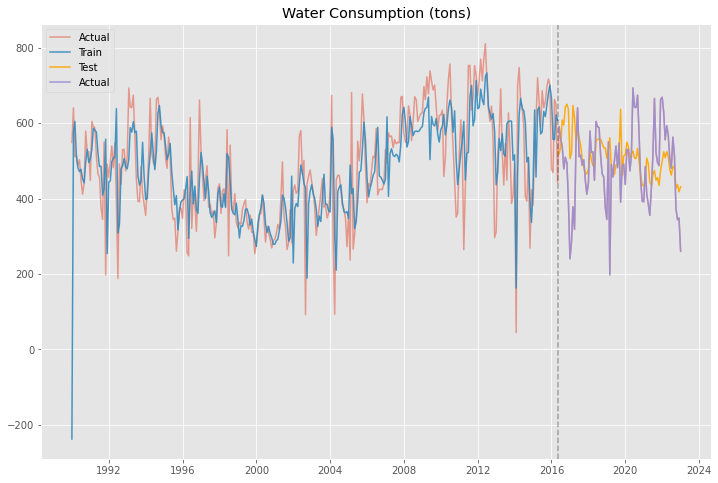

In [52]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
plot_forecast(ax,'Water Consumption (tons)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     Water Consumption (tons)   No. Observations:                  317
Model:                       ARIMA(2, 1, 1)   Log Likelihood               -1883.433
Date:                      Fri, 11 Aug 2023   AIC                           3778.866
Time:                              23:01:58   BIC                           3801.401
Sample:                          01-01-1990   HQIC                          3787.869
                               - 05-01-2016                                         
Covariance Type:                        opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Electricity Consumption (MWh)    -0.0067      0.080     -0.084      0.933      -0.164       0.150
Gas Consumption (tons)          -12.9579      1.032    -12.554      0.000     -14.981     -10.935
ar.L1                             0.5374      0.046     11.722      0.000       0.448       0.627
ar.L2                             0.0251      0.057      0.443      0.658      -0.086       0.136
ma.L1                            -0.9616      0.020    -47.223      0.000      -1.002      -0.922
sigma2                         8762.0695    565.632     15.491      0.000    7653.451    9870.688
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                81.53
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.58
Prob(H) (two-sided):                  0.18   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

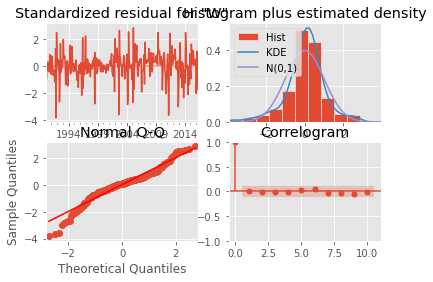

In [53]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above,
- We can see that it is indepndently distributed, hence it is a white noise time series
- Residual does have common variance
- Data is not normal
- Forecast is nicely fit






</div>



#### SARIMAX

- Seasonal AutoRegressive Integrated Moving Average, and SARIMAX extends this model to include exogenous variables (hence the 'X')

Below, we will collate the differnt order for arima which includes ar, ma and arima model combined

In [54]:
orders_wc_seasonal = [(1,0,0,12),(1,0,1,12)] 

In [56]:
mv_scores_sarima_baseline_wc = pd.DataFrame(columns=scores_num_cols_new)
for order in tqdm(order_mv_wc):
    for seasonal_order in tqdm(orders_wc_seasonal):
        mv_scores_sarima_baseline_wc, results = expanding_window(SARIMAX, f'Water Consumption {order} {seasonal_order}', endog=train_data['Water Consumption (tons)'],  scores=mv_scores_sarima_baseline_wc, exog=train_data[[
                                                                 'Electricity Consumption (MWh)', 'Gas Consumption (tons)']], order=order, seasonal_order=seasonal_order)


100%|██████████| 8/8 [00:47<00:00,  5.94s/it]


In [57]:
style_result(mv_scores_sarima_baseline_wc.groupby('Consumption').mean())


,train_root_mean_squared_error,test_root_mean_squared_error,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,AIC,BIC
Consumption,,,,,,
"Water Consumption (0, 0, 1) (1, 0, 0, 12)",104.796414,166.098140,0.215231,0.397455,1916.480480,1931.260666
"Water Consumption (0, 0, 1) (1, 0, 1, 12)",101.475703,153.060831,0.211840,0.369353,1906.217037,1923.953259
"Water Consumption (0, 0, 2) (1, 0, 0, 12)",101.784612,166.179596,0.202732,0.401431,1909.882680,1927.618903
"Water Consumption (0, 0, 2) (1, 0, 1, 12)",98.615183,153.078217,0.199456,0.369848,1899.904907,1920.597167
"Water Consumption (0, 1, 1) (1, 0, 0, 12)",112.894173,185.147617,0.186313,0.422233,1855.492989,1870.233691
"Water Consumption (0, 1, 1) (1, 0, 1, 12)",111.414414,213.043571,0.183320,0.495976,1855.278100,1872.966943
"Water Consumption (1, 0, 0) (1, 0, 0, 12)",99.367876,154.446346,0.195417,0.367424,1901.251074,1916.031259
"Water Consumption (1, 0, 0) (1, 0, 1, 12)",95.609065,141.445232,0.189177,0.334434,1889.609096,1907.345318
"Water Consumption (1, 1, 0) (1, 0, 0, 12)",117.417500,203.623019,0.184973,0.465527,1868.099111,1882.839813


__Plot Forecast__

In [58]:
model = SARIMAX(endog=train_data['Water Consumption (tons)'],  exog=train_data[[
                'Electricity Consumption (MWh)', 'Gas Consumption (tons)']], order=(2, 1, 1), seasonal_order=(1, 0, 0, 12)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes, exog=test_data[[
                      'Electricity Consumption (MWh)', 'Gas Consumption (tons)']])


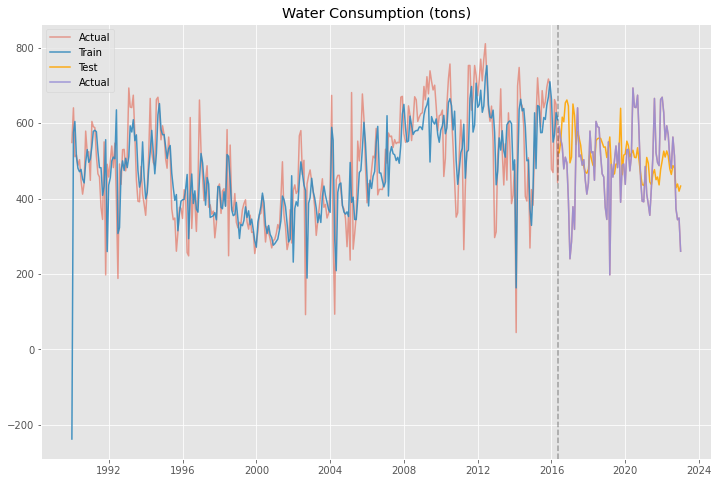

In [59]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
plot_forecast(ax,'Water Consumption (tons)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:            Water Consumption (tons)   No. Observations:                  317
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 12)   Log Likelihood               -1882.186
Date:                             Fri, 11 Aug 2023   AIC                           3778.372
Time:                                     23:03:46   BIC                           3804.663
Sample:                                 01-01-1990   HQIC                          3788.875
                                      - 05-01-2016                                         
Covariance Type:                               opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Electricity Consumption (MWh)    -0.0050      0.087     -0.057      0.954      -0.175       0.165
Gas Consumption (tons)          -13.0345      1.044    -12.480      0.000     -15.082     -10.988
ar.L1                             0.5403      0.046     11.730      0.000       0.450       0.631
ar.L2                             0.0384      0.057      0.669      0.504      -0.074       0.151
ma.L1                            -0.9680      0.018    -53.970      0.000      -1.003      -0.933
ar.S.L12                          0.0917      0.062      1.468      0.142      -0.031       0.214
sigma2                         8690.4276    562.556     15.448      0.000    7587.839    9793.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                78.50
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                            -0.53
Prob(H) (two-sided):                  0.23   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

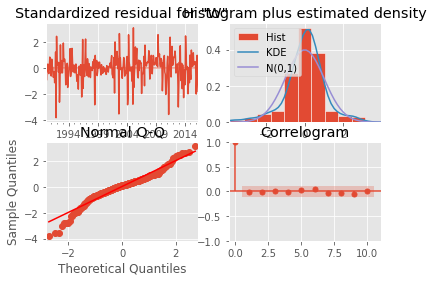

In [60]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above,
- We can see that it is indepndently distributed, hence it is a white noise time series
- Residual does have common variance
- Data is not normal
- Forecast is not nicely fit






</div>



## <font color='#71a1e3'> __Hyperparameter tuning (Multivariate Analysis)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

Hyperparameter tuning is where we start to select the values suitable for the parameters in the different models, and which is where a search will have to be done here 

### Gas Consumption 

#### ARIMA

Running the results

In [61]:
scores_arima_gc_ht_mv = pd.DataFrame(columns=scores_num_cols_new)
for p in tqdm(range(0, 10)):
    for q in range(0, 10):
        for d in range(2):
            try:
                scores_arima_gc_ht_mv, results = expanding_window(ARIMA, f'Gas Consumption ({p},{d},{q})', endog=train_data['Gas Consumption (tons)'],  scores=scores_arima_gc_ht_mv, exog=train_data[[
                                                                  'Water Consumption (tons)', 'Electricity Consumption (MWh)']], order=(p, d, q))
            except:
                pass


  0%|          | 0/10 [00:00<?, ?it/s]100%|██████████| 10/10 [07:36<00:00, 45.64s/it]


Checking the results for top 5

In [62]:
style_result(scores_arima_gc_ht_mv.groupby('Consumption').mean().sort_values(by=['test_root_mean_squared_error']).head(10))

,train_root_mean_squared_error,test_root_mean_squared_error,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,AIC,BIC
Consumption,,,,,,
"Gas Consumption (7,0,2)",2.537906,5.249033,0.086634,0.180159,775.958991,814.387474
"Gas Consumption (7,0,3)",2.534140,5.266169,0.086788,0.179339,777.148772,818.533292
"Gas Consumption (9,0,6)",2.476076,5.303210,0.085089,0.185050,781.274077,837.438783
"Gas Consumption (7,0,1)",2.535551,5.306121,0.086702,0.179394,773.202392,808.674838
"Gas Consumption (7,0,7)",2.482319,5.320533,0.084781,0.190613,778.857039,832.065707
"Gas Consumption (7,0,0)",2.574272,5.324076,0.088136,0.188237,774.572978,807.089387
"Gas Consumption (1,0,1)",2.608316,5.345479,0.088406,0.179617,767.747225,785.483448
"Gas Consumption (1,0,2)",2.606017,5.351995,0.089090,0.183581,770.105886,790.798146
"Gas Consumption (5,0,0)",2.593692,5.353458,0.088466,0.189615,772.306535,798.910869


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above, best 

| p | d | q |
| ---    | ---                    | ---                | 
 | 7                    | 0                | 2                   |

</div>



__Plot Forecast__

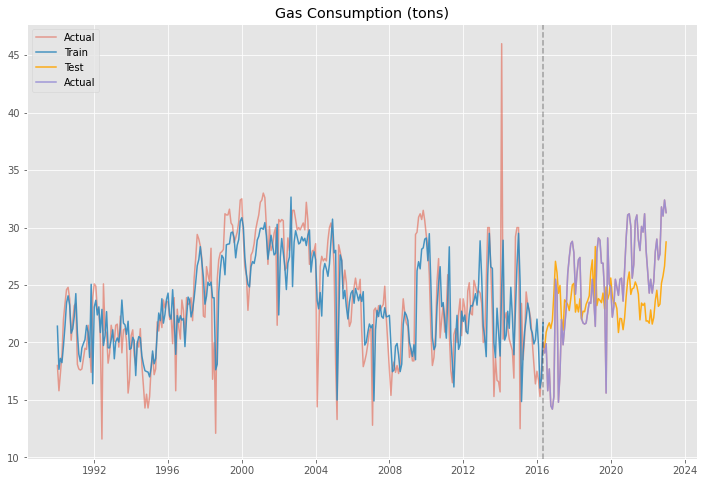

In [63]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

model = ARIMA(endog = train_data['Gas Consumption (tons)'] ,  exog = train_data[['Water Consumption (tons)','Electricity Consumption (MWh)']], order=(7,0,2)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data[['Water Consumption (tons)','Electricity Consumption (MWh)']])
plot_forecast(ax,'Gas Consumption (tons)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Gas Consumption (tons)   No. Observations:                  317
Model:                     ARIMA(7, 0, 2)   Log Likelihood                -820.755
Date:                    Fri, 11 Aug 2023   AIC                           1667.510
Time:                            23:11:27   BIC                           1716.376
Sample:                        01-01-1990   HQIC                          1687.030
                             - 05-01-2016                                         
Covariance Type:                      opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            25.7336      2.777      9.265      0.000      20.290      31.177
Water Consumption (tons)         -0.0149      0.001    -14.001      0.000      -0.017      -0.013
Electricity Consumption (MWh)     0.0053      0.003      1.689      0.091      -0.001       0.012
ar.L1                             0.3235      1.551      0.209      0.835      -2.717       3.364
ar.L2                             0.1374      1.398      0.098      0.922      -2.603       2.878
ar.L3                             0.0386      0.443      0.087      0.930      -0.830       0.907
ar.L4                             0.0371      0.142      0.262      0.793      -0.240       0.315
ar.L5                            -0.0183      0.125     -0.146      0.884      -0.264       0.227
ar.L6                             0.0654      0.084      0.782      0.434      -0.099       0.229
ar.L7                             0.0622      0.128      0.487      0.626      -0.188       0.313
ma.L1                             0.2893      1.555      0.186      0.852      -2.758       3.337
ma.L2                             0.1196      0.753      0.159      0.874      -1.356       1.595
sigma2                           10.2900      0.615     16.745      0.000       9.086      11.494
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               717.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

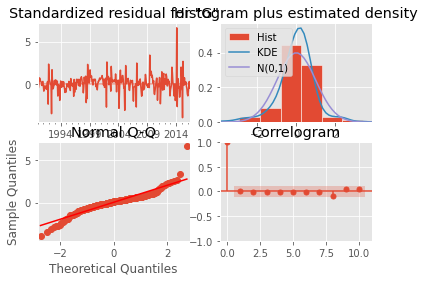

In [64]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above, order (1,1,1) provided a good aic score and a good forecast plot
- We can see that it is indepndently distributed, hence it is a white noise time series
- Residual does not have common variance
- Data is not normal
- Forecast is nicely fit






</div>



#### SARIMAX

Running the results

In [65]:
p_range = range(0, 5)
q_range = range(0, 5)
P_range = range(0, 2)
Q_range = range(0, 2)
m = [12]
scores_sarima_gc_ht_mv = pd.DataFrame(columns=scores_num_cols_new)

for p, q, P, Q, m in tqdm(itertools.product(*(p_range, q_range, P_range, Q_range, m))):
    try:
        scores_sarima_gc_ht_mv, results = expanding_window(SARIMAX, f'Gas Consumption ({p},1,{q}) ({P},0,{Q},{m})', endog=train_data['Gas Consumption (tons)'],  scores=scores_sarima_gc_ht_mv, exog=train_data[[
                                                           'Electricity Consumption (MWh)', 'Water Consumption (tons)']], order=(p, 1, q), seasonal_order=(P, 0, Q, m))
    except:
        continue


0it [00:00, ?it/s]100it [03:37,  2.17s/it]


Checking the result for top 5

In [66]:
style_result(scores_sarima_gc_ht_mv.groupby('Consumption').mean().sort_values(by=['test_root_mean_squared_error']).head(10))

,train_root_mean_squared_error,test_root_mean_squared_error,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,AIC,BIC
Consumption,,,,,,
"Gas Consumption (3,1,1) (0,0,0,12)",3.091799,5.779707,0.093743,0.219718,760.809327,781.446310
"Gas Consumption (3,1,2) (0,0,1,12)",3.060961,5.787816,0.092864,0.220783,763.743401,790.276665
"Gas Consumption (4,1,2) (0,0,0,12)",3.086431,5.796783,0.093322,0.220559,764.343144,790.876408
"Gas Consumption (3,1,2) (1,0,1,12)",3.063142,5.805055,0.092491,0.221311,765.634564,795.115968
"Gas Consumption (3,1,2) (0,0,0,12)",3.078761,5.810669,0.093173,0.221779,762.124919,785.710042
"Gas Consumption (3,1,2) (1,0,0,12)",3.081836,5.842325,0.092971,0.222396,763.716136,790.249399
"Gas Consumption (4,1,2) (1,0,1,12)",3.070274,5.860357,0.092693,0.222939,767.558796,799.988340
"Gas Consumption (1,1,3) (0,0,0,12)",3.154724,5.901379,0.094899,0.223340,759.979991,780.616974
"Gas Consumption (3,1,1) (1,0,1,12)",3.066056,5.911111,0.092870,0.225436,763.725512,790.258775


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the results above, we can see that the best order are (3,1,1) (0,0,0,12) 

</div>



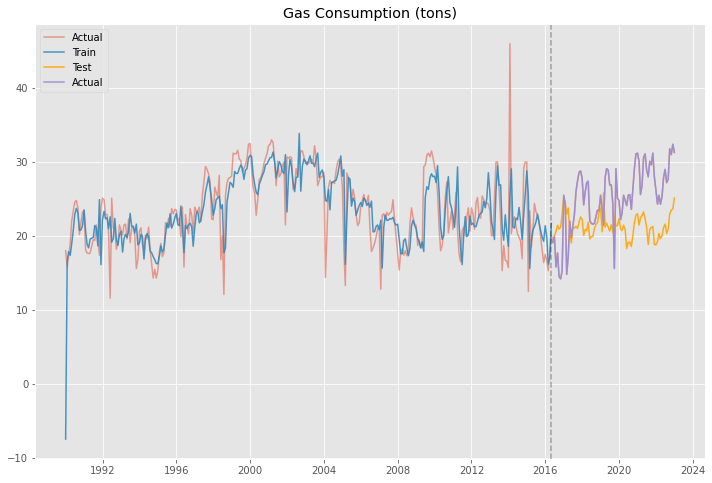

In [67]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

model = SARIMAX(endog=train_data['Gas Consumption (tons)'],  exog=train_data[[
                'Water Consumption (tons)', 'Electricity Consumption (MWh)']], order=(3, 1 ,1 ), seasonal_order=(0, 0, 0, 12)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data[['Water Consumption (tons)','Electricity Consumption (MWh)']])
plot_forecast(ax,'Gas Consumption (tons)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Gas Consumption (tons)   No. Observations:                  317
Model:                   SARIMAX(3, 1, 1)   Log Likelihood                -818.739
Date:                    Fri, 11 Aug 2023   AIC                           1651.478
Time:                            23:15:06   BIC                           1677.768
Sample:                        01-01-1990   HQIC                          1661.981
                             - 05-01-2016                                         
Covariance Type:                      opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Water Consumption (tons)         -0.0151      0.001    -15.985      0.000      -0.017      -0.013
Electricity Consumption (MWh)     0.0011      0.003      0.400      0.689      -0.004       0.007
ar.L1                             0.5018      0.052      9.631      0.000       0.400       0.604
ar.L2                             0.0695      0.070      0.995      0.320      -0.067       0.206
ar.L3                            -0.0761      0.075     -1.013      0.311      -0.223       0.071
ma.L1                            -0.9181      0.037    -24.896      0.000      -0.990      -0.846
sigma2                            9.5450      0.450     21.231      0.000       8.664      10.426
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               664.18
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               2.33   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

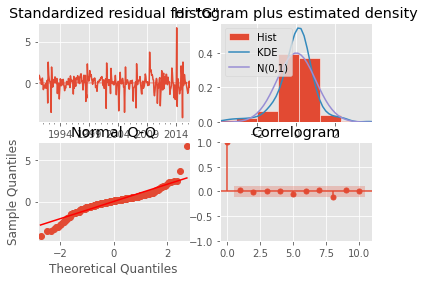

In [68]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above,
- We can see that it is not indepndently distributed, hence it is a white noise time series
- Residual does not have common variance
- Data is not normal
- Forecast is not nicely fit






</div>



### Electricity Consumption 

#### ARIMA

Running the results

In [69]:
scores_arima_ec_ht_mv = pd.DataFrame(columns=scores_num_cols_new)
for p in tqdm(range(0, 10)):
    for q in range(0, 10):
        for d in range(2):
            try:
                scores_arima_ec_ht_mv, results = expanding_window(ARIMA, f'Electricity Consumption ({p},{d},{q})', endog=train_data['Electricity Consumption (MWh)'],  scores=scores_arima_ec_ht_mv, exog=train_data[[
                                                                  'Water Consumption (tons)', 'Gas Consumption (tons)']], order=(p, d, q))
            except:
                pass


  0%|          | 0/10 [00:00<?, ?it/s]100%|██████████| 10/10 [07:27<00:00, 44.71s/it]


Checking the results for top 5

In [70]:
style_result(scores_arima_ec_ht_mv.groupby('Consumption').mean().sort_values(by=['test_root_mean_squared_error']).head(10))

,train_root_mean_squared_error,test_root_mean_squared_error,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,AIC,BIC
Consumption,,,,,,
"Electricity Consumption (6,1,9)",68.296264,64.469677,0.034148,0.056748,1492.750789,1545.817316
"Electricity Consumption (7,1,9)",67.454256,65.587075,0.032489,0.059024,1487.205320,1543.219987
"Electricity Consumption (4,0,3)",30.223349,68.604183,0.030218,0.059599,1571.495845,1604.012253
"Electricity Consumption (7,1,8)",65.859541,69.052176,0.030377,0.061727,1481.008864,1534.075391
"Electricity Consumption (4,1,4)",67.205719,69.789191,0.035903,0.061451,1509.110536,1541.540081
"Electricity Consumption (5,1,2)",67.974527,70.323936,0.037265,0.059796,1510.631062,1540.112466
"Electricity Consumption (2,1,2)",68.273588,70.341791,0.037064,0.061716,1501.001376,1521.638358
"Electricity Consumption (4,0,5)",30.891902,70.425323,0.030440,0.060987,1563.259781,1601.688263
"Electricity Consumption (9,1,6)",64.937953,70.682557,0.029415,0.063995,1457.632723,1510.699250


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above, best few

| p | d | q |
| ---    | ---                    | ---                | 
 | 6                     | 1                  | 9                  |

</div>



__Plot Forecast__

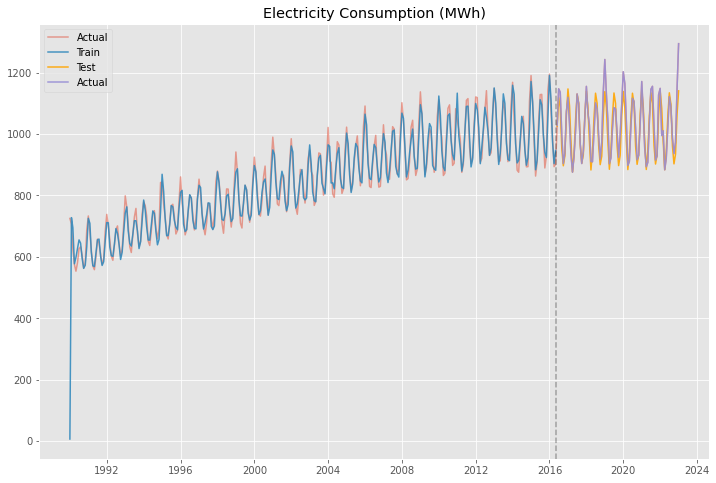

In [71]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

model = ARIMA(endog = train_data['Electricity Consumption (MWh)'] ,  exog = train_data[['Water Consumption (tons)','Gas Consumption (tons)']], order=(6,1,9)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data[['Water Consumption (tons)','Gas Consumption (tons)']])
plot_forecast(ax,'Electricity Consumption (MWh)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Electricity Consumption (MWh)   No. Observations:                  317
Model:                            ARIMA(6, 1, 9)   Log Likelihood               -1507.635
Date:                           Fri, 11 Aug 2023   AIC                           3051.270
Time:                                   23:22:38   BIC                           3118.874
Sample:                               01-01-1990   HQIC                          3078.277
                                    - 05-01-2016                                         
Covariance Type:                             opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Water Consumption (tons)     0.0008      0.026      0.032      0.975      -0.049       0.051
Gas Consumption (tons)       0.3494      0.615      0.568      0.570      -0.855       1.554
ar.L1                        0.7069      0.173      4.089      0.000       0.368       1.046
ar.L2                       -0.0430      0.073     -0.591      0.554      -0.186       0.100
ar.L3                       -0.9476      0.070    -13.552      0.000      -1.085      -0.811
ar.L4                       -0.1651      0.094     -1.762      0.078      -0.349       0.019
ar.L5                        0.8291      0.097      8.540      0.000       0.639       1.019
ar.L6                       -0.8212      0.141     -5.814      0.000      -1.098      -0.544
ma.L1                       -0.9248      0.212     -4.372      0.000      -1.339      -0.510
ma.L2                       -0.0986      0.168     -0.587      0.557      -0.428       0.231
ma.L3                        1.1523      0.171      6.758      0.000       0.818       1.486
ma.L4                       -0.0727      0.249     -0.292      0.770      -0.561       0.416
ma.L5                       -1.2028      0.247     -4.872      0.000      -1.687      -0.719
ma.L6                        0.9032      0.287      3.147      0.002       0.341       1.466
ma.L7                        0.0355      0.136      0.260      0.795      -0.232       0.303
ma.L8                       -0.3634      0.146     -2.483      0.013      -0.650      -0.077
ma.L9                        0.0133      0.153      0.087      0.931      -0.286       0.313
sigma2                    1122.2883    156.600      7.167      0.000     815.357    1429.220
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                17.94
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.97   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

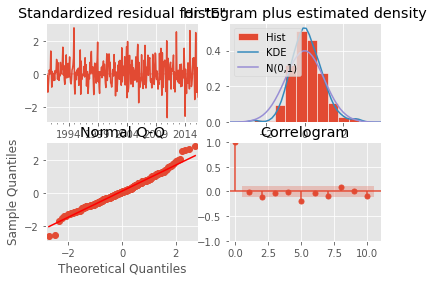

In [72]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above, 
- We can see that it is indepndently distributed, hence it is a white noise time series
- Residual does not have common variance
- Data is not normal
- Forecast is not nicely fit






</div>



#### SARIMAX

Running the results

In [73]:
p_range = range(0, 5)
q_range = range(0, 5)
P_range = range(0, 2)
Q_range = range(0, 2)
m = [12]
scores_sarima_ec_ht_mv = pd.DataFrame(columns=scores_num_cols_new)

for p, q, P, Q, m in tqdm(itertools.product(*(p_range, q_range, P_range, Q_range, m))):
    try:
        scores_sarima_ec_ht_mv, results = expanding_window(SARIMAX, f'Electricity Consumption ({p},1,{q}) ({P},0,{Q},{m})', endog=train_data['Electricity Consumption (MWh)'],  scores=scores_sarima_ec_ht_mv, exog=train_data[[
                                                           'Gas Consumption (tons)', 'Water Consumption (tons)']], order=(p, 1, q), seasonal_order=(P, 0, Q, m))
    except:
        continue


0it [00:00, ?it/s]100it [03:47,  2.28s/it]


In [74]:
style_result(scores_sarima_ec_ht_mv.groupby('Consumption').mean().sort_values(by=['test_root_mean_squared_error']).head(10))

,train_root_mean_squared_error,test_root_mean_squared_error,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,AIC,BIC
Consumption,,,,,,
"Electricity Consumption (1,1,3) (1,0,1,12)",66.520752,34.662097,0.030277,0.030816,1401.241981,1427.775245
"Electricity Consumption (3,1,4) (1,0,1,12)",66.430879,35.442851,0.028768,0.029824,1402.759021,1438.136706
"Electricity Consumption (0,1,1) (1,0,1,12)",68.417365,36.740453,0.033030,0.033147,1412.899476,1430.588318
"Electricity Consumption (4,1,0) (1,0,1,12)",66.580047,37.280974,0.029690,0.032496,1400.183572,1426.716835
"Electricity Consumption (3,1,0) (1,0,1,12)",66.969505,38.962085,0.030680,0.034693,1406.240800,1429.825923
"Electricity Consumption (0,1,4) (1,0,1,12)",68.948738,39.019285,0.033634,0.033930,1453.076222,1479.609486
"Electricity Consumption (0,1,2) (1,0,1,12)",67.490525,39.950639,0.032821,0.035809,1464.248487,1484.885469
"Electricity Consumption (0,1,3) (1,0,1,12)",66.373869,40.013491,0.029836,0.036047,1391.429815,1415.014938
"Electricity Consumption (4,1,1) (1,0,1,12)",66.615949,40.492259,0.029652,0.035166,1394.919976,1424.401380


Checking the result for top 5

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the results above, we can see that the best order are  (1,1,3) (1,0,1,12)

</div>



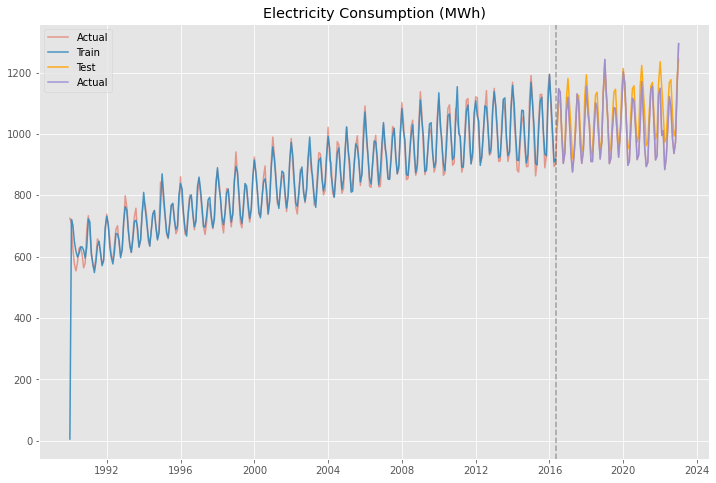

In [75]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

model = SARIMAX(endog=train_data['Electricity Consumption (MWh)'],  exog=train_data[[
                'Water Consumption (tons)', 'Gas Consumption (tons)']], order=(1, 1 ,3 ), seasonal_order=(1, 0, 1, 12)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data[['Water Consumption (tons)','Gas Consumption (tons)']])
plot_forecast(ax,'Electricity Consumption (MWh)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:        Electricity Consumption (MWh)   No. Observations:                  317
Model:             SARIMAX(1, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -1452.688
Date:                              Fri, 11 Aug 2023   AIC                           2923.375
Time:                                      23:26:32   BIC                           2957.177
Sample:                                  01-01-1990   HQIC                          2936.879
                                       - 05-01-2016                                         
Covariance Type:                                opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Water Consumption (tons)     0.0077      0.014      0.557      0.577      -0.019       0.035
Gas Consumption (tons)       0.0490      0.234      0.209      0.834      -0.410       0.507
ar.L1                        0.6463      0.315      2.052      0.040       0.029       1.264
ma.L1                       -1.0762      0.328     -3.283      0.001      -1.719      -0.434
ma.L2                       -0.0838      0.158     -0.529      0.597      -0.394       0.227
ma.L3                        0.1872      0.172      1.086      0.278      -0.151       0.525
ar.S.L12                     0.9996      0.000   2126.617      0.000       0.999       1.000
ma.S.L12                    -0.8030      0.043    -18.647      0.000      -0.887      -0.719
sigma2                     603.4166     46.698     12.922      0.000     511.891     694.943
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                40.49
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               3.00   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

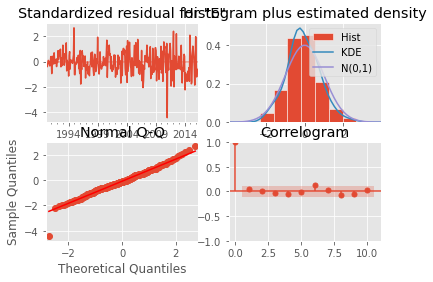

In [76]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above,
- We can see that it is indepndently distributed, hence it is a white noise time series
- Residual does not have common variance
- Data is not normal
- Forecast is not nicely fit






</div>



### Water Consumption 

#### ARIMA

Running the results

In [77]:
scores_arima_wc_ht_mv = pd.DataFrame(columns=scores_num_cols_new)
for p in tqdm(range(0, 10)):
    for q in range(0, 10):
        for d in range(2):
            try:
                scores_arima_wc_ht_mv, results = expanding_window(ARIMA, f'Water Consumption ({p},{d},{q})', endog=train_data['Water Consumption (tons)'],  scores=scores_arima_wc_ht_mv, exog=train_data[[
                                                                  'Gas Consumption (tons)', 'Electricity Consumption (MWh)']], order=(p, d, q))
            except:
                pass


  0%|          | 0/10 [00:00<?, ?it/s]100%|██████████| 10/10 [07:08<00:00, 42.85s/it]


Checking the results for top 5

In [78]:
style_result(scores_arima_wc_ht_mv.groupby('Consumption').mean().sort_values(by=['test_root_mean_squared_error']).head(10))

,train_root_mean_squared_error,test_root_mean_squared_error,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,AIC,BIC
Consumption,,,,,,
"Water Consumption (2,0,3)",85.362299,123.596429,0.163911,0.243384,1862.220513,1888.824847
"Water Consumption (3,0,2)",85.002170,124.285552,0.162640,0.246086,1861.383110,1887.987444
"Water Consumption (8,0,3)",83.188375,124.581346,0.160679,0.248863,1868.760513,1913.101070
"Water Consumption (4,0,1)",85.186538,124.687081,0.163771,0.252607,1861.842188,1888.446522
"Water Consumption (5,0,1)",85.205271,124.753267,0.164099,0.253087,1863.938252,1893.498623
"Water Consumption (3,0,1)",86.045043,124.767331,0.166366,0.246771,1861.310395,1884.958692
"Water Consumption (1,0,4)",85.892971,124.985586,0.165825,0.246363,1863.159226,1889.763560
"Water Consumption (2,0,1)",86.154801,125.061376,0.166445,0.245674,1859.820991,1880.513251
"Water Consumption (2,0,2)",85.181873,125.091204,0.164103,0.252873,1859.758178,1883.406475


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above, best few

| p | d | q |
| ---    | ---                    | ---                | 
 | 2                     | 0                  | 3                   |

</div>



__Plot Forecast__

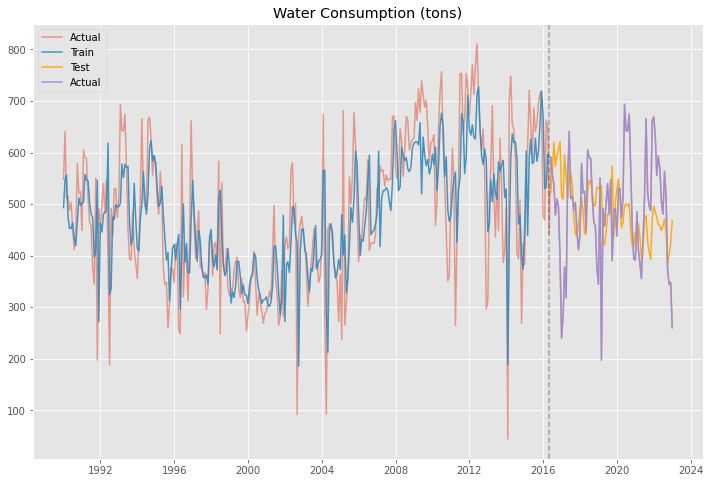

In [79]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

model = ARIMA(endog = train_data['Water Consumption (tons)'] ,  exog = train_data[['Electricity Consumption (MWh)','Gas Consumption (tons)']], order=(2,0,3)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data[['Electricity Consumption (MWh)','Gas Consumption (tons)']])
plot_forecast(ax,'Water Consumption (tons)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     Water Consumption (tons)   No. Observations:                  317
Model:                       ARIMA(2, 0, 3)   Log Likelihood               -1892.290
Date:                      Fri, 11 Aug 2023   AIC                           3802.580
Time:                              23:33:43   BIC                           3836.410
Sample:                          01-01-1990   HQIC                          3816.093
                               - 05-01-2016                                         
Covariance Type:                        opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           542.2739     76.521      7.087      0.000     392.296     692.252
Electricity Consumption (MWh)     0.2152      0.082      2.626      0.009       0.055       0.376
Gas Consumption (tons)          -11.3962      0.982    -11.602      0.000     -13.321      -9.471
ar.L1                             1.4222      0.284      5.006      0.000       0.865       1.979
ar.L2                            -0.4353      0.268     -1.622      0.105      -0.961       0.091
ma.L1                            -0.8506      0.293     -2.908      0.004      -1.424      -0.277
ma.L2                            -0.0390      0.136     -0.288      0.773      -0.305       0.227
ma.L3                            -0.0367      0.118     -0.312      0.755      -0.267       0.194
sigma2                         8740.7450    590.379     14.805      0.000    7583.623    9897.867
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                55.98
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.48
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

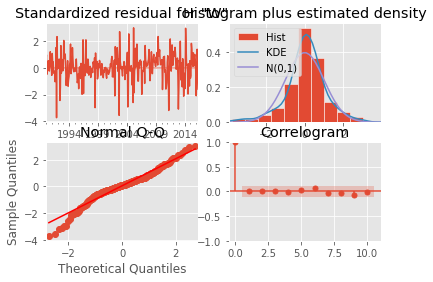

In [80]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above,
- We can see that it is indepndently distributed, hence it is a white noise time series
- Residual does not have common variance
- Data is not normal
- Forecast is not nicely fit






</div>



#### SARIMAX

Running the results

In [81]:
p_range = range(0, 5)
q_range = range(0, 5)
P_range = range(0, 2)
Q_range = range(0, 2)
m = [12]
scores_sarima_wc_ht_mv = pd.DataFrame(columns=scores_num_cols_new)

for p, q, P, Q, m in tqdm(itertools.product(*(p_range, q_range, P_range, Q_range, m))):
    try:
        scores_sarima_wc_ht_mv, results = expanding_window(SARIMAX, f'Water Consumption ({p},1,{q}) ({P},0,{Q},{m})', endog=train_data['Water Consumption (tons)'],  scores=scores_sarima_wc_ht_mv, exog=train_data[[
                                                           'Electricity Consumption (MWh)', 'Gas Consumption (tons)']], order=(p, 1, q), seasonal_order=(P, 0, Q, m))
    except:
        continue


0it [00:00, ?it/s]100it [03:09,  1.90s/it]


Checking the result for top 5

In [82]:
style_result(scores_sarima_wc_ht_mv.groupby('Consumption').mean().sort_values(by=['test_root_mean_squared_error']).head(10))

,train_root_mean_squared_error,test_root_mean_squared_error,train_mean_absolute_percentage_error,test_mean_absolute_percentage_error,AIC,BIC
Consumption,,,,,,
"Water Consumption (1,1,3) (0,0,1,12)",112.229913,125.040887,0.180980,0.266328,1853.558840,1877.143964
"Water Consumption (1,1,3) (1,0,0,12)",112.290543,125.305741,0.181072,0.266809,1853.467291,1877.052414
"Water Consumption (1,1,3) (0,0,0,12)",112.452937,125.315228,0.181122,0.267333,1851.617820,1872.254803
"Water Consumption (1,1,3) (1,0,1,12)",111.873837,126.040870,0.179819,0.272042,1854.586244,1881.119507
"Water Consumption (4,1,4) (1,0,0,12)",110.801035,128.660064,0.176034,0.267024,1856.636472,1892.014156
"Water Consumption (4,1,4) (0,0,1,12)",110.755188,130.049119,0.176816,0.270117,1857.215186,1892.592871
"Water Consumption (4,1,4) (0,0,0,12)",111.234681,130.589815,0.176050,0.267541,1854.156659,1886.586203
"Water Consumption (3,1,4) (0,0,0,12)",112.923419,132.337256,0.178062,0.268157,1854.515194,1883.996598
"Water Consumption (2,1,4) (1,0,1,12)",111.768848,132.400190,0.178145,0.271844,1855.477221,1887.906766


<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the results above, we can see that the best order are  (1,1,3) (0,0,1,12)

</div>



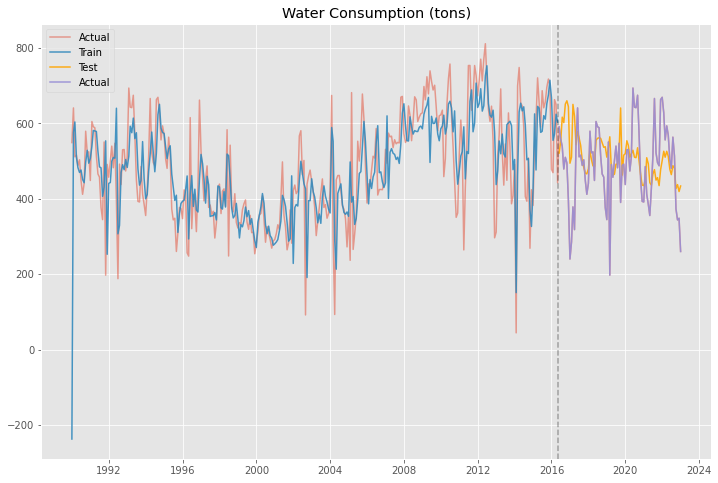

In [83]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

model = SARIMAX(endog=train_data['Water Consumption (tons)'],  exog=train_data[[
                'Gas Consumption (tons)', 'Electricity Consumption (MWh)']], order=(1, 1 ,3 ), seasonal_order=(0, 0, 1, 12)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data[['Gas Consumption (tons)','Electricity Consumption (MWh)']])
plot_forecast(ax,'Water Consumption (tons)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:             Water Consumption (tons)   No. Observations:                  317
Model:             SARIMAX(1, 1, 3)x(0, 0, [1], 12)   Log Likelihood               -1882.309
Date:                              Fri, 11 Aug 2023   AIC                           3780.617
Time:                                      23:36:56   BIC                           3810.663
Sample:                                  01-01-1990   HQIC                          3792.621
                                       - 05-01-2016                                         
Covariance Type:                                opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Gas Consumption (tons)          -13.1979      1.077    -12.257      0.000     -15.308     -11.087
Electricity Consumption (MWh)     0.0007      0.086      0.009      0.993      -0.167       0.169
ar.L1                             0.6839      0.113      6.066      0.000       0.463       0.905
ma.L1                            -1.1131      0.126     -8.808      0.000      -1.361      -0.865
ma.L2                             0.0865      0.092      0.945      0.345      -0.093       0.266
ma.L3                             0.0499      0.087      0.573      0.567      -0.121       0.221
ma.S.L12                          0.0847      0.064      1.330      0.184      -0.040       0.210
sigma2                         8828.0637    582.934     15.144      0.000    7685.534    9970.594
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                77.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                            -0.52
Prob(H) (two-sided):                  0.23   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

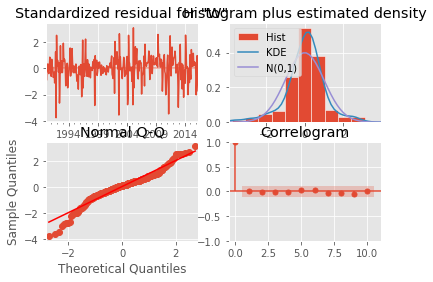

In [84]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From both of the results above,
- We can see that it is indepndently distributed, hence it is a white noise time series
- Residual does have common variance
- Data is not normal
- Forecast is not nicely fit






</div>



<a class="anchor" id="14"></a>
## <font color='#71a1e3'> __VARIMAX__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

With the above statistical test, we know that varmax can be done as different time series influence one another

### Gas Consumption as predictor

In [85]:
model = VARMAX(exog=train_data['Gas Consumption (tons)'], endog=train_data[['Water Consumption (tons)','Electricity Consumption (MWh)']], order=(1, 1)).fit(maxiter=1000, disp=False)
model.summary()


Dep. Variable:,"['Water Consumption (tons)', 'Electricity Consumption (MWh)']",No. Observations:,317
Model:,"VARMAX(1,1)",Log Likelihood,-3643.274
,+ intercept,AIC,7316.549
Date:,"Fri, 11 Aug 2023",BIC,7372.932
Time:,23:37:32,HQIC,7339.071
Sample:,01-01-1990,,
,- 05-01-2016,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.00, 2.20",Jarque-Bera (JB):,"67.63, 7.21"
Prob(Q):,"0.98, 0.14",Prob(JB):,"0.00, 0.03"
Heteroskedasticity (H):,"1.31, 2.54",Skew:,"-0.54, 0.32"


#### Water Consumption

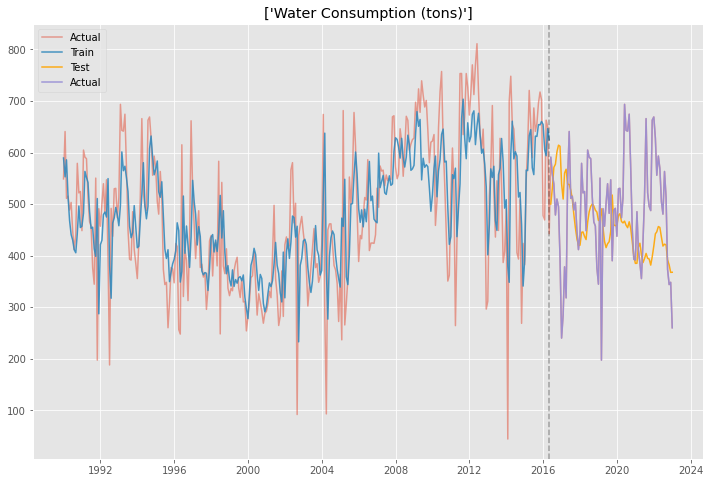

In [86]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data['Gas Consumption (tons)'])
plot_forecast(ax,['Water Consumption (tons)'],df_set_date, full_pred[['Water Consumption (tons)']], pred['Water Consumption (tons)'],train_data.index[-1] )
plt.show()

#### Electricity Consumption

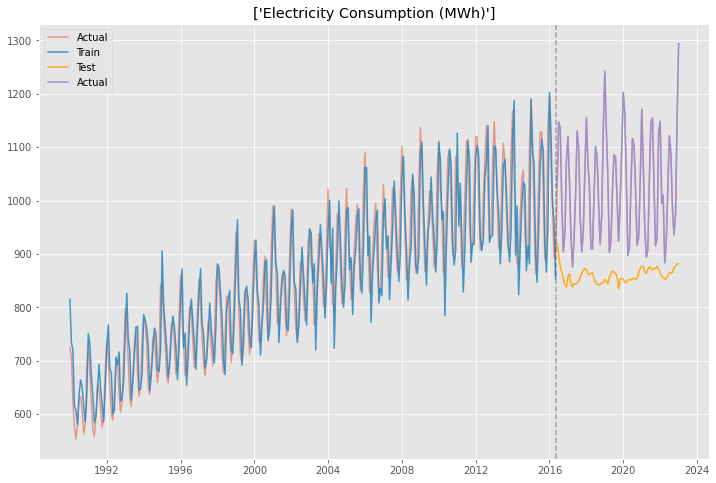

In [87]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data['Gas Consumption (tons)'])
plot_forecast(ax,['Electricity Consumption (MWh)'],df_set_date, full_pred[['Electricity Consumption (MWh)']], pred['Electricity Consumption (MWh)'],train_data.index[-1] )
plt.show()

### Electricity Consumption as predictor

In [88]:
model = VARMAX(exog=train_data['Electricity Consumption (MWh)'], endog=train_data[['Water Consumption (tons)','Gas Consumption (tons)']], order=(1, 1)).fit(maxiter=1000, disp=False)
model.summary()


Dep. Variable:,"['Water Consumption (tons)', 'Gas Consumption (tons)']",No. Observations:,317
Model:,"VARMAX(1,1)",Log Likelihood,-2744.121
,+ intercept,AIC,5518.242
Date:,"Fri, 11 Aug 2023",BIC,5574.626
Time:,23:38:02,HQIC,5540.765
Sample:,01-01-1990,,
,- 05-01-2016,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"1.72, 1.85",Jarque-Bera (JB):,"89.81, 684.04"
Prob(Q):,"0.19, 0.17",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"1.32, 2.16",Skew:,"-0.22, 0.17"


#### Water Consumption

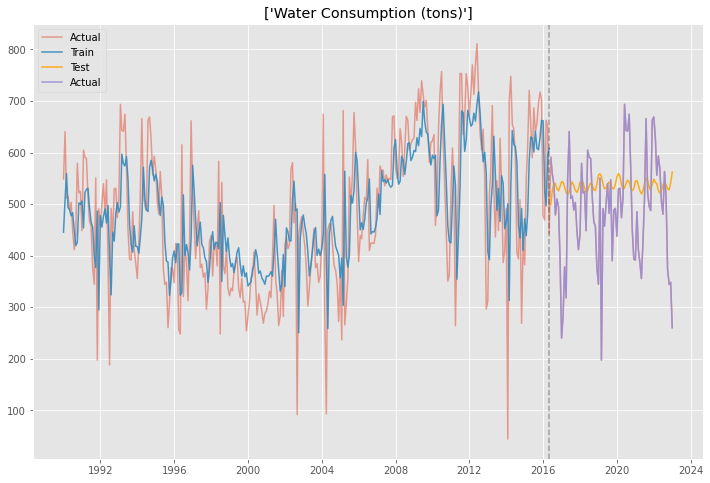

In [89]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data['Electricity Consumption (MWh)'])
plot_forecast(ax,['Water Consumption (tons)'],df_set_date, full_pred[['Water Consumption (tons)']], pred['Water Consumption (tons)'],train_data.index[-1] )
plt.show()

#### Gas Consumption

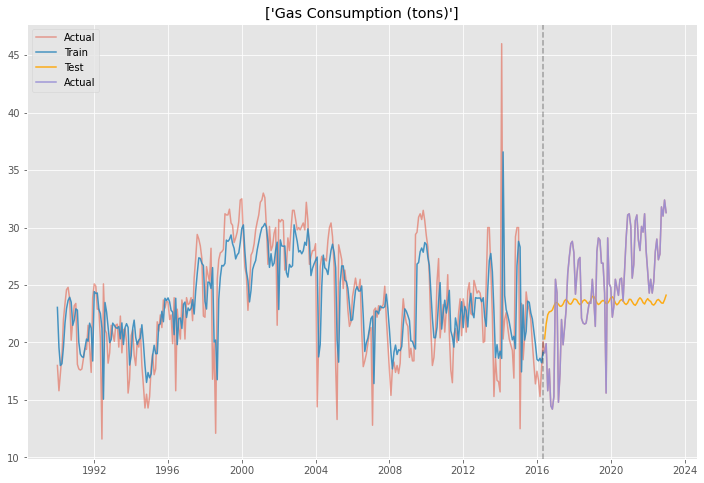

In [90]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data['Electricity Consumption (MWh)'])
plot_forecast(ax,['Gas Consumption (tons)'],df_set_date, full_pred[['Gas Consumption (tons)']], pred['Gas Consumption (tons)'],train_data.index[-1] )
plt.show()

### Water Consumption as predictor

In [91]:
model = VARMAX(exog=train_data['Water Consumption (tons)'], endog=train_data[['Electricity Consumption (MWh)','Gas Consumption (tons)']], order=(1, 1)).fit(maxiter=1000, disp=False)
model.summary()


Dep. Variable:,"['Electricity Consumption (MWh)', 'Gas Consumption (tons)']",No. Observations:,317
Model:,"VARMAX(1,1)",Log Likelihood,-2595.653
,+ intercept,AIC,5221.306
Date:,"Fri, 11 Aug 2023",BIC,5277.690
Time:,23:38:28,HQIC,5243.829
Sample:,01-01-1990,,
,- 05-01-2016,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"2.25, 0.02",Jarque-Bera (JB):,"4.93, 899.83"
Prob(Q):,"0.13, 0.90",Prob(JB):,"0.09, 0.00"
Heteroskedasticity (H):,"2.43, 2.80",Skew:,"0.29, 0.11"


#### Electricity Consumption

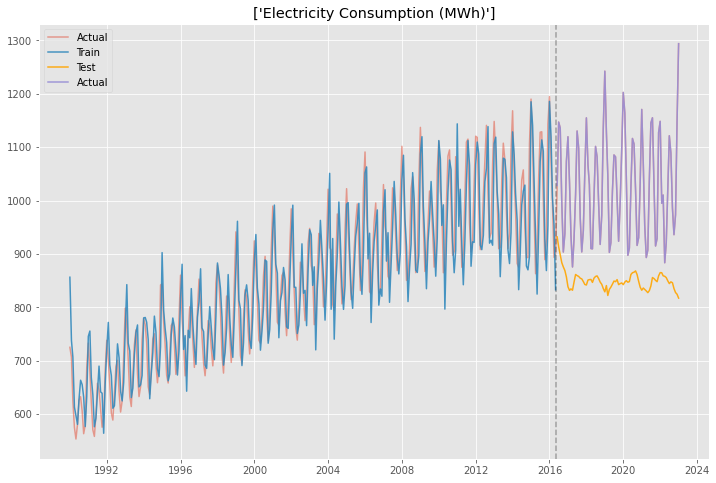

In [92]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data['Water Consumption (tons)'])
plot_forecast(ax,['Electricity Consumption (MWh)'],df_set_date, full_pred[['Electricity Consumption (MWh)']], pred['Electricity Consumption (MWh)'],train_data.index[-1] )
plt.show()

#### Gas Consumption

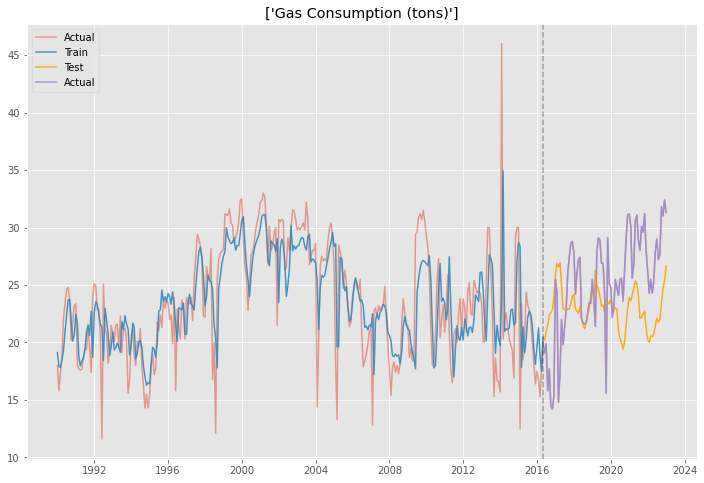

In [93]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data['Water Consumption (tons)'])
plot_forecast(ax,['Gas Consumption (tons)'],df_set_date, full_pred[['Gas Consumption (tons)']], pred['Gas Consumption (tons)'],train_data.index[-1] )
plt.show()

<a class="anchor" id="14"></a>
## <font color='#71a1e3'> __Final Model (Combination of Univariate and Multivariate)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">

### Gas Consumption

From the above results, the best multivariate model is Arima (7,0,2)

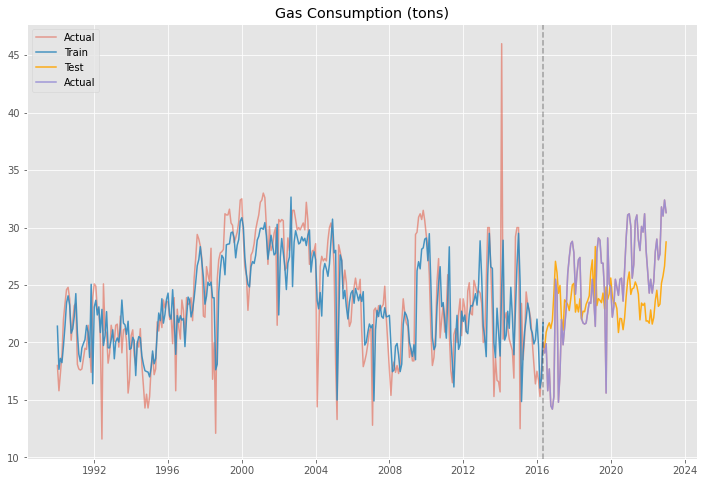

In [94]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

model = ARIMA(endog = train_data['Gas Consumption (tons)'] ,  exog = train_data[['Water Consumption (tons)','Electricity Consumption (MWh)']], order=(7,0,2)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data[['Water Consumption (tons)','Electricity Consumption (MWh)']])
plot_forecast(ax,'Gas Consumption (tons)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

In [95]:
print('Evaluation')
evluation_2('Gas Consumption (tons)',test_data['Gas Consumption (tons)'],pred, 'test',model)

Evaluation


{'Consumption': 'Gas Consumption (tons)',
 'test_root_mean_squared_error': 4.36710430056649,
 'test_mean_absolute_percentage_error': 0.15608365224013734,
 'AIC': 1667.5103977542503,
 'BIC': 1716.376120814655}

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Gas Consumption (tons)   No. Observations:                  317
Model:                     ARIMA(7, 0, 2)   Log Likelihood                -820.755
Date:                    Fri, 11 Aug 2023   AIC                           1667.510
Time:                            23:38:32   BIC                           1716.376
Sample:                        01-01-1990   HQIC                          1687.030
                             - 05-01-2016                                         
Covariance Type:                      opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            25.7336      2.777      9.265      0.000      20.290      31.177
Water Consumption (tons)         -0.0149      0.001    -14.001      0.000      -0.017      -0.013
Electricity Consumption (MWh)     0.0053      0.003      1.689      0.091      -0.001       0.012
ar.L1                             0.3235      1.551      0.209      0.835      -2.717       3.364
ar.L2                             0.1374      1.398      0.098      0.922      -2.603       2.878
ar.L3                             0.0386      0.443      0.087      0.930      -0.830       0.907
ar.L4                             0.0371      0.142      0.262      0.793      -0.240       0.315
ar.L5                            -0.0183      0.125     -0.146      0.884      -0.264       0.227
ar.L6                             0.0654      0.084      0.782      0.434      -0.099       0.229
ar.L7                             0.0622      0.128      0.487      0.626      -0.188       0.313
ma.L1                             0.2893      1.555      0.186      0.852      -2.758       3.337
ma.L2                             0.1196      0.753      0.159      0.874      -1.356       1.595
sigma2                           10.2900      0.615     16.745      0.000       9.086      11.494
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               717.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

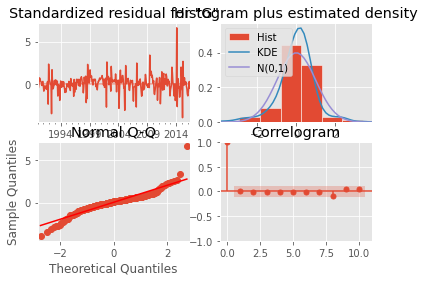

In [96]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the results above,
- ARIMA (7,0,2)
- RMSE 4.37 MAPE 0.15 AIC 1667 BIC 1716
- Independently distributed, hence it is a white noise time series
- Residual does not have common variance
- Data is not normal
- Forecast is nicely fit


</div>



### Electricity Consumption

From the above results, the best multivariate model is Arima (6,1,9)

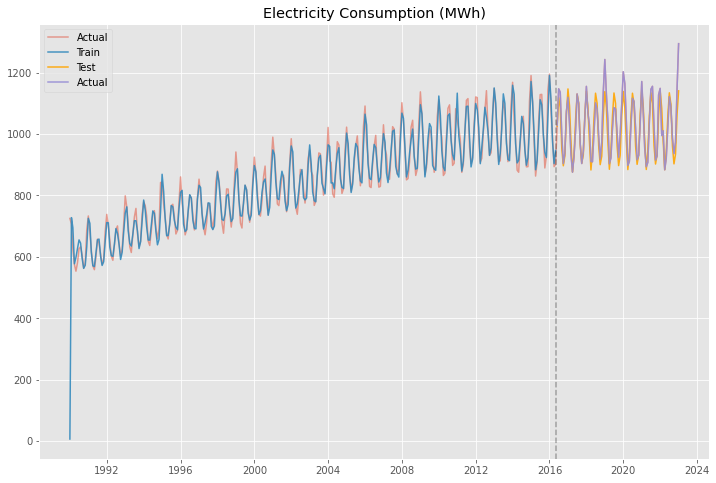

In [97]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

model = ARIMA(endog = train_data['Electricity Consumption (MWh)'] ,  exog = train_data[['Water Consumption (tons)','Gas Consumption (tons)']], order=(6,1,9)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data[['Water Consumption (tons)','Gas Consumption (tons)']])
plot_forecast(ax,'Electricity Consumption (MWh)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Electricity Consumption (MWh)   No. Observations:                  317
Model:                            ARIMA(6, 1, 9)   Log Likelihood               -1507.635
Date:                           Fri, 11 Aug 2023   AIC                           3051.270
Time:                                   23:38:37   BIC                           3118.874
Sample:                               01-01-1990   HQIC                          3078.277
                                    - 05-01-2016                                         
Covariance Type:                             opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Water Consumption (tons)     0.0008      0.026      0.032      0.975      -0.049       0.051
Gas Consumption (tons)       0.3494      0.615      0.568      0.570      -0.855       1.554
ar.L1                        0.7069      0.173      4.089      0.000       0.368       1.046
ar.L2                       -0.0430      0.073     -0.591      0.554      -0.186       0.100
ar.L3                       -0.9476      0.070    -13.552      0.000      -1.085      -0.811
ar.L4                       -0.1651      0.094     -1.762      0.078      -0.349       0.019
ar.L5                        0.8291      0.097      8.540      0.000       0.639       1.019
ar.L6                       -0.8212      0.141     -5.814      0.000      -1.098      -0.544
ma.L1                       -0.9248      0.212     -4.372      0.000      -1.339      -0.510
ma.L2                       -0.0986      0.168     -0.587      0.557      -0.428       0.231
ma.L3                        1.1523      0.171      6.758      0.000       0.818       1.486
ma.L4                       -0.0727      0.249     -0.292      0.770      -0.561       0.416
ma.L5                       -1.2028      0.247     -4.872      0.000      -1.687      -0.719
ma.L6                        0.9032      0.287      3.147      0.002       0.341       1.466
ma.L7                        0.0355      0.136      0.260      0.795      -0.232       0.303
ma.L8                       -0.3634      0.146     -2.483      0.013      -0.650      -0.077
ma.L9                        0.0133      0.153      0.087      0.931      -0.286       0.313
sigma2                    1122.2883    156.600      7.167      0.000     815.357    1429.220
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                17.94
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.97   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

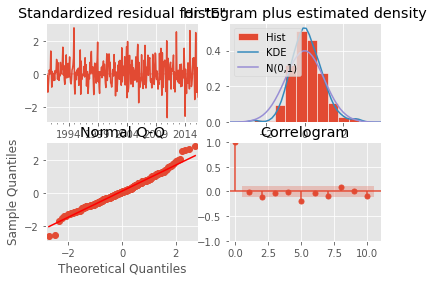

In [98]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

In [99]:
print('Evaluation')
evluation_2('Electricity Consumption (MWh)',test_data['Electricity Consumption (MWh)'],pred, 'test',model)

Evaluation


{'Consumption': 'Electricity Consumption (MWh)',
 'test_root_mean_squared_error': 42.364499907781,
 'test_mean_absolute_percentage_error': 0.030832456766636335,
 'AIC': 3051.270321426956,
 'BIC': 3118.87368127152}

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the results above,
- ARIMA (7,0,2)
- RMSE 42.3  MAPE 0.03 AIC 3051  BIC 3118
- Independently distributed, hence it is a white noise time series
- Residual does not have common variance
- Data is not normal
- Forecast is nicely fit



</div>



### Water Consumption

From the above results, the best multivariate model is Arima (2,0,3)

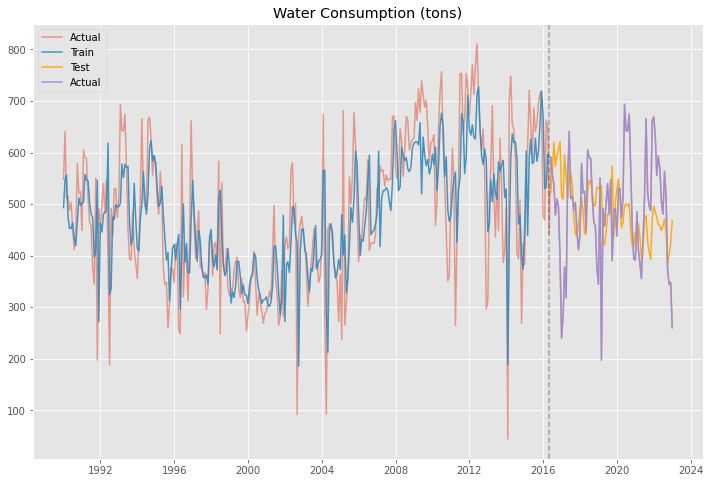

In [100]:
fig,ax = plt.subplots(1,1,figsize=(12,8))

model = ARIMA(endog = train_data['Water Consumption (tons)'] ,  exog = train_data[['Electricity Consumption (MWh)','Gas Consumption (tons)']], order=(2,0,3)).fit()
full_pred = model.predict()
pred = model.forecast(test_sizes,exog=test_data[['Electricity Consumption (MWh)','Gas Consumption (tons)']])
plot_forecast(ax,'Water Consumption (tons)',df_set_date, full_pred, pred,train_data.index[-1] )
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     Water Consumption (tons)   No. Observations:                  317
Model:                       ARIMA(2, 0, 3)   Log Likelihood               -1892.290
Date:                      Fri, 11 Aug 2023   AIC                           3802.580
Time:                              23:38:40   BIC                           3836.410
Sample:                          01-01-1990   HQIC                          3816.093
                               - 05-01-2016                                         
Covariance Type:                        opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           542.2739     76.521      7.087      0.000     392.296     692.252
Electricity Consumption (MWh)     0.2152      0.082      2.626      0.009       0.055       0.376
Gas Consumption (tons)          -11.3962      0.982    -11.602      0.000     -13.321      -9.471
ar.L1                             1.4222      0.284      5.006      0.000       0.865       1.979
ar.L2                            -0.4353      0.268     -1.622      0.105      -0.961       0.091
ma.L1                            -0.8506      0.293     -2.908      0.004      -1.424      -0.277
ma.L2                            -0.0390      0.136     -0.288      0.773      -0.305       0.227
ma.L3                            -0.0367      0.118     -0.312      0.755      -0.267       0.194
sigma2                         8740.7450    590.379     14.805      0.000    7583.623    9897.867
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                55.98
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.48
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 576x576 with 0 Axes>

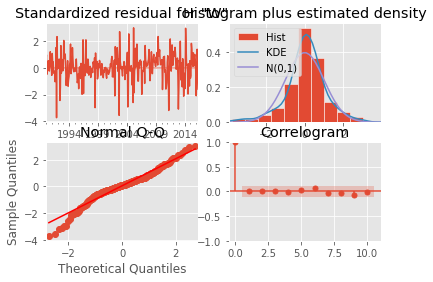

In [101]:
plt.figure(figsize=(8,8))
model.plot_diagnostics()
display(model.summary())
plt.show()

In [102]:
print('Evaluation')
evluation_2('Water Consumption (tons)',test_data['Water Consumption (tons)'],pred, 'test',model)

Evaluation


{'Consumption': 'Water Consumption (tons)',
 'test_root_mean_squared_error': 111.71882566049658,
 'test_mean_absolute_percentage_error': 0.20505092259726326,
 'AIC': 3802.580045428535,
 'BIC': 3836.4101613934304}

<div class="alert alert-block" style="background-color:#a7c6d6; padding: 10px; border: 3px solid lightblue; border-radius: 5px; color:black">
<u><b><i>Things Observed</i></b></u>

From the results above,
- ARIMA (7,0,2)
- RMSE 111  MAPE 0.2 AIC 3802  BIC 3836
- Independently distributed, hence it is a white noise time series
- Residual does not have common variance
- Data is not normal
- Forecast is nicely fit



</div>



## <font color='#71a1e3'> __Final Conclusion__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c77">


Through this, multivariate forecasting resulted in better result and hence better forecasting